<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_5_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 5: Regression
# 21130429 - Phạm Tiến Lộc


# Regression

- Classification predicts a **categorical** value
    - a finite set of values
- Regression predicts a **numerical** value
    - a possibly infinite set of values
    - can be interpolating or extrapolating

## Regression Estimators

Regression estimators work in the same way as classification estimators in scikit-learn:

Linear Regression Models:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

K-Nearest Neighbor Regression:
- [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

Decision Tree Regression:
- [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

Neural Network Regression:
- [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


#Import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, SelectFwe
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline

#Task 1. With **dataset1**

#Task 1.1. Load **dataset1** using Pandas and split 70% for training set and 30% for test set

In [4]:
#code
ds1 = pd.read_csv('dataset1.csv')

length = ds1['length']
weight = ds1['weight']

features = ds1['age'].values.reshape(-1,1)

features_train, features_test, length_train, length_test, weight_train, weight_test = train_test_split(features, length, weight, test_size=0.3, random_state=42)

#Task 1.2. Generate plots to determine the relationship between each combination as belows (i.e., between age and temp, between age and weight, ...)

age temp
age weight
age length
temp weight
temp length
weight length


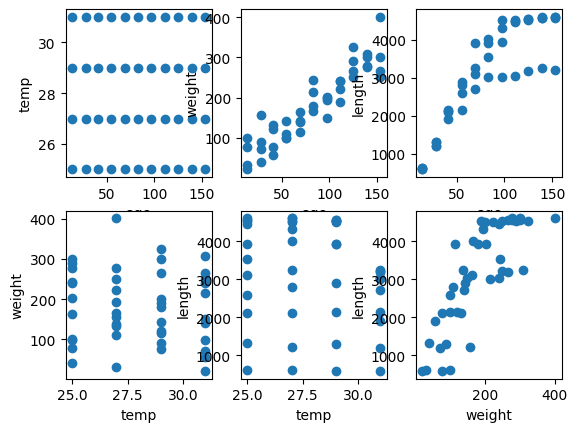

In [5]:
#code
# a list of all columns
feature_list = [ 'age', 'temp', 'weight', 'length' ]
ix = 1
fig = plt.figure()
# generate all combinations of considered columns
combinations = itertools.combinations(feature_list, 2)
for com in combinations:
  print(com[0], com[1])
  axs = fig.add_subplot(2,3, ix)

  axs.scatter(ds1[com[0]], ds1[com[1]])

  axs.set_xlabel(com[0])
  axs.set_ylabel(com[1])

  ix+=1


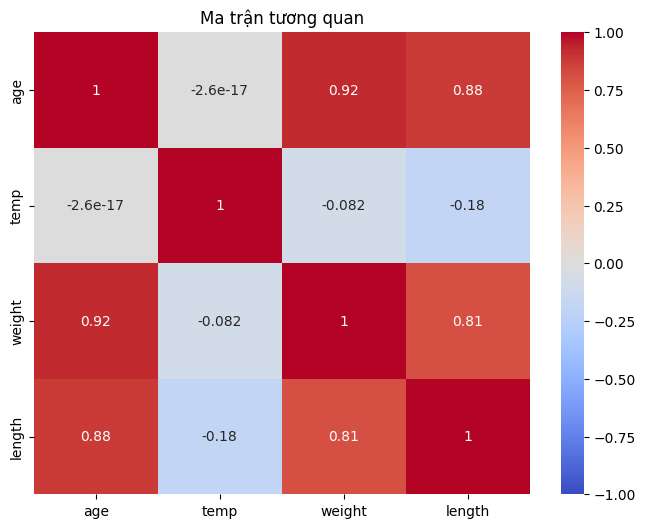

In [6]:
#code
correlation_matrix = ds1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan')
plt.show()
# age với length có độ tương quan dương chặt chẽ
# age với weight có độ tương quan dương chặt chẽ
# length với weight có độ tương quan dương chặt chẽ

#Task 1.3. Apply LinearRegression to which combinations that have linear relationship.

In [12]:
#code
linear_regression = LinearRegression()
estimator1 = linear_regression.fit(features_train, length_train)

estimator2 = linear_regression.fit(features_train, weight_train)

#Task 1.4. Plot train/test/prediction to visualize the relationship between them

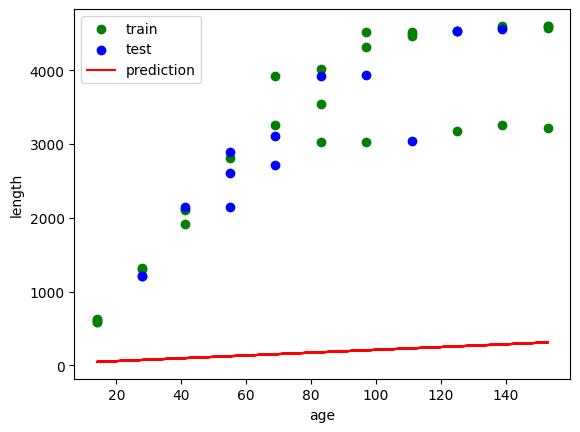

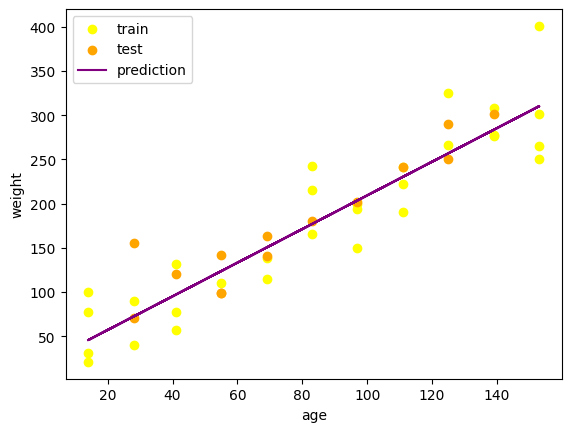

In [8]:
#code
# age với length
plt.scatter(features_train, length_train, c='green', label='train')
plt.scatter(features_test, length_test, c='blue', label='test')

plt.plot(ds1['age'], estimator1.predict(ds1['age'].values.reshape(-1, 1)), c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.show()


# age với weight
plt.scatter(features_train, weight_train, c='yellow', label='train')
plt.scatter(features_test, weight_test, c='orange', label='test')

plt.plot(ds1['age'], estimator2.predict(ds1['age'].values.reshape(-1, 1)), c='purple', label='prediction')

plt.xlabel('age')
plt.ylabel('weight')
plt.legend()
plt.show()


#Task 1.5. Apply Polynomial regression to which combinations that have non-linear relationship

In [9]:
#code
poly = PolynomialFeatures(degree=2, include_bias=False)

pipeline = Pipeline([('transformer', poly), ('estimator', estimator1)])

pipeline.fit(features_train, length_train)

prediction = pipeline.predict(features)

#Task 1.6. Plot train/test/prediction to visualize the relationship between them

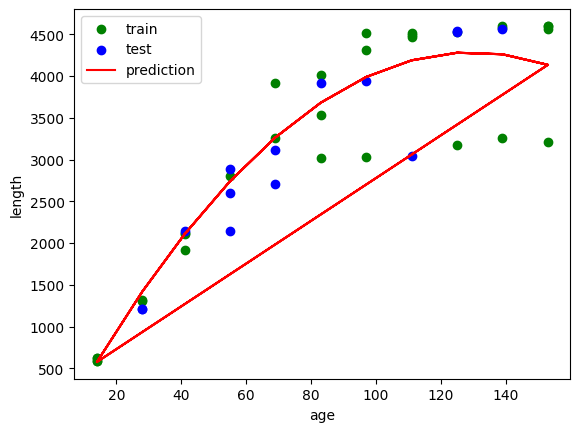

In [10]:
#code
plt.scatter(features_train, length_train, c='green', label='train')
plt.scatter(features_test, length_test, c='blue', label='test')

plt.plot(ds1['age'], prediction, c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.show()

#Task 1.7. Measure the performance of the different regression models trained before. Use 10-fold cross validation and RMSE as well as R² for evaluation.

In [50]:
#code
length_prediction = cross_val_predict(estimator1, features, length)

rmse = np.sqrt(mean_squared_error(length, length_prediction))
r2 = r2_score(length, length_prediction)
print('RMSE: ', rmse)
print('R2: ', r2)


RMSE:  723.4960647322282
R2:  0.6967290132690376


##Task 1.8. Apply GridSeachCV to find the influence of **k** on performance of **KNeighborsRegressor**

In [19]:
#code
kNN = KNeighborsRegressor()

kNN_param_grid = {'n_neighbors': range(3, 7)}

grid_kNN_class = GridSearchCV(estimator=kNN, param_grid=kNN_param_grid, cv=5, scoring='neg_mean_squared_error')

grid_kNN_class.fit(features_train, length_train)

best_k = grid_kNN_class.best_params_['n_neighbors']

kNN_score = grid_kNN_class.best_score_

kNN_estimator = grid_kNN_class.best_estimator_

kNN_prediction = kNN_estimator.predict(features_test)

mse = mean_squared_error(length_test, kNN_prediction)

print('Best k: ', best_k)
print('Score: ', kNN_score)
print('MSE: ', mse)

Best k:  5
Score:  -348026.044
MSE:  310071.30571428576


#Task 2. With dataset2

#Task 2.1. Load **dataset2**, apply StandardScaler() to standardize datataset and repare trainning set, test set. Notice that, y is **Birthweigth** column; **id** column needs to drop.

In [48]:
#code
ds2_train = pd.read_csv('dataset2_train.csv', sep=';')
ds2_test = pd.read_csv('dataset2_test.csv', sep=';')

ds2_train = ds2_train.drop(columns=['id'])
ds2_test = ds2_test.drop(columns=['id'])

X_train = ds2_train.drop(columns=['Birthweight'])
y_train = ds2_train['Birthweight']
X_test = ds2_test.drop(columns=['Birthweight'])
y_test = ds2_test['Birthweight']

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

#Task 2.2. Apply Linear Regression to the training set/test set obtained in Task 2.1. Report the perfomrance of the model on test set in termns of RMSE, R^2

In [49]:
#code
linear_regression = LinearRegression()
linear_regression.fit(X_train_scale, y_train)

y_pred = linear_regression.predict(X_test_scale)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  1.059939020622682
R2:  0.4045457161854157


#Task 2.3. Apply feature selection to find the most correlated feature to the target (y) using F-Regression and inspect the p-values for each feature.


*   Then, fit a second regression model using only the significant features (p<=0.05). How does the performance (i.e., RMSE, R^2) of the model change?



In [52]:
#code
f_score, p_values = f_regression(X_train_scale, y_train)

features = X_train.columns

res = pd.DataFrame({
    'Feature': features,
    'F-Score': f_score,
    'P-Value': p_values
})

res = res.sort_values(by='P-Value')

print(res)
print('most correlated feature: ', res.iloc[0])

                    Feature    F-Score   P-Value
3                    length  22.885328  0.000054
2          headcirumference  19.444167  0.000149
4                 Gestation  13.989168  0.000876
7                    mnocig   2.556162  0.121503
0      LowBirthWeight = Low   2.476791  0.127184
1   LowBirthWeight = Normal   2.476791  0.127184
14                   lowbwt   2.476791  0.127184
8                   mheight   2.087771  0.159989
9                     mppwt   1.818643  0.188679
5                    smoker   1.574123  0.220362
10                     fage   0.342294  0.563366
6                 motherage   0.195507  0.661894
11                   fedyrs   0.062778  0.804055
13                  fheight   0.042181  0.838816
12                   fnocig   0.011407  0.915735
15                   mage35   0.001354  0.970916
most correlated feature:  Feature       length
F-Score    22.885328
P-Value     0.000054
Name: 3, dtype: object


#Task 3. With **dataset3**
The dataset3 included 12 continuous attributes and 1 binary attribute concerning the price of houses.

#Task 3.1. Load **dataset3**, apply StandardScaler() to standardize datataset and repare trainning set, test set

In [57]:
#code
ds3_train = pd.read_csv('dataset3_train.csv', sep=';')
ds3_test = pd.read_csv('dataset3_test.csv', sep=';')

X_train = ds3_train.drop(columns=['MEDV'])
y_train = ds3_train['MEDV']
X_test = ds3_test.drop(columns=['MEDV'])
y_test = ds3_test['MEDV']

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

#Task 3.2. Apply **LinearRegression**, **Ridge**, **KNeighborsRegressor**, **DecisionTreeRegressor**, **MLPRegressor** to train models using above training set

In [62]:
#code
# LinearRegression
linear_regression.fit(X_train_scale, y_train)
y_pred_lr = linear_regression.predict(X_test_scale)

# Ridge
r_regression = Ridge()
r_regression.fit(X_train_scale, y_train)
y_pred_ridge = r_regression.predict(X_test_scale)

# KNeighborsRegressor

kNN.fit(X_train_scale, y_train)
y_pred_kNN = kNN.predict(X_test_scale)

# DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_scale, y_train)
y_pred_dt = dt_regressor.predict(X_test_scale)

# MLPRegressor

mlp_regressor = MLPRegressor(max_iter=1000)
mlp_regressor.fit(X_train_scale, y_train)
y_pred_mlp = mlp_regressor.predict(X_test_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#Task 3.3. Report the performance of models using metrics RMSE, R^2 (as PrettyTable)

In [63]:
#code
# LinearRegression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

# Ridge
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

# KNeighborsRegressor
rmse_kNN = mean_squared_error(y_test, y_pred_kNN, squared=False)
r2_kNN= r2_score(y_test, y_pred_kNN)

# DecisionTreeRegressor
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)

# MLPRegressor
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

from prettytable import PrettyTable
myTable = PrettyTable(["Model", "RMSE", "R^2"])

myTable.add_row(["Linear Regression", rmse_lr, r2_lr])
myTable.add_row(["Ridge Regression", rmse_ridge, r2_ridge])
myTable.add_row(["KNeighbors Regressor", rmse_kNN, r2_kNN])
myTable.add_row(["Decision Tree Regressor", rmse_dt, r2_dt])
myTable.add_row(["MLP Regressor", rmse_mlp, r2_mlp])

print(myTable)

+-------------------------+--------------------+--------------------+
|          Model          |        RMSE        |        R^2         |
+-------------------------+--------------------+--------------------+
|    Linear Regression    |  4.5658126405605   | 0.717095277729944  |
|     Ridge Regression    | 4.559867331157114  | 0.7178315589442767 |
|   KNeighbors Regressor  | 4.346653280035355  | 0.7436023603246558 |
| Decision Tree Regressor | 5.010180425367618  | 0.6593481465240294 |
|      MLP Regressor      | 2.9595721835339983 |  0.88113283682017  |
+-------------------------+--------------------+--------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [ ]:
#Pretty table demo
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Student Name", "Class", "Section", "Percentage"])

# Add rows
myTable.add_row(["Leanord", "X", "B", "91.2 %"])
myTable.add_row(["Penny", "X", "C", "63.5 %"])
myTable.add_row(["Howard", "X", "A", "90.23 %"])
myTable.add_row(["Bernadette", "X", "D", "92.7 %"])
myTable.add_row(["Sheldon", "X", "A", "98.2 %"])
myTable.add_row(["Raj", "X", "B", "88.1 %"])
myTable.add_row(["Amy", "X", "B", "95.0 %"])

print(myTable)

+--------------+-------+---------+------------+
| Student Name | Class | Section | Percentage |
+--------------+-------+---------+------------+
|   Leanord    |   X   |    B    |   91.2 %   |
|    Penny     |   X   |    C    |   63.5 %   |
|    Howard    |   X   |    A    |  90.23 %   |
|  Bernadette  |   X   |    D    |   92.7 %   |
|   Sheldon    |   X   |    A    |   98.2 %   |
|     Raj      |   X   |    B    |   88.1 %   |
|     Amy      |   X   |    B    |   95.0 %   |
+--------------+-------+---------+------------+
